# Prediction Analysis

This notebook imports data from the ../tests/data directory and must be redirected if the directory has moved.

This analysis is for the IFAC 2017 manuscript, and will evaluate all blended data sets and tally the missed predictions.

### Blended performance data

Load dataframes for every blended trial.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
cd ../tests/data

/Users/mitchallain/Development/Python/BeagleBone-excavator/tests/data


In [6]:
ls

BoomComparison.pdf             manual_1016_1720.csv
auto.csv                       manual_1016_1735.csv
auto_0928_1824.csv             manual_1021_mitch.csv
auto_0928_1845.csv             manual_1021_shyam.csv
auto_0928_1846.csv             manual_1101_2326.csv
autonomous5.csv                manual_1102_1809.csv
autonomous_1016_1533.csv       manual_1102_1829.csv
autonomous_1024_1959.csv       manual_1102_1834.csv
autonomous_1026_0936.csv       manual_data.ipynb
autonomous_1026_0941.csv       manual_mitch_1101_2319.csv
autonomous_endpts.mat          manual_mitch_1101_2333.csv
blend_1101_1457.csv            manual_mitch_1102_1814.csv
blend_1101_1502.csv            manual_mitch_1102_1819.csv
blend_test_1022_1512.csv       manual_ol_0301_0928.csv
blend_test_1022_1801.csv       manual_ol_0301_0929.csv
blended_1022_1824.csv          manual_ol_0927_1919.csv
blended_1022_1937.csv          manual_ol_1006_1648.csv
blended_1022_1943.csv          manual_ol_1010_2055.csv
blended_1022_2007.csv     

In [8]:
# Import the trials listed in 'manual_trials.xlsx'
trial_names = ['blended_shyam_1102_1844.csv', 'blended_shyam_1102_1854.csv',
               'blended_shyam_1102_1902.csv', 'blended_1102_0002.csv',
               'blended_1102_0007.csv', 'blended_orlando_1102_1429.csv', 
               'blended_1102_1906.csv', 'blended_1102_1913.csv']
trials = []
for t in trial_names:
    trials.append(pd.read_csv(t))

# Preview the first trial:
trials[0].head()

,Time,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ctrl,Stick Ctrl,Bucket Ctrl,Swing Ctrl,Boom Blended,Stick Blended,Bucket Blended,Swing Blended,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Class,Confidence,Unnamed: 19
0,0.000995,0.0,0.0,0.0,0.0,-10.502105,-13.8448,-3.529862,0.0,7.4745,6.9645,7.614,7.4695,10.102105,8.9632,3.208966,0.0,0,False,NaN
1,0.065472,0.0,0.0,0.0,0.0,-10.464737,-13.9012,-3.608966,0.0,7.4745,6.9645,7.614,7.4695,10.064737,9.0008,3.208966,0.0,0,False,NaN
2,0.098178,0.0,0.0,0.0,0.0,-10.502105,-13.9012,-3.587414,0.0,7.4745,6.9645,7.614,7.4695,10.102105,9.0008,3.187414,0.0,0,False,NaN
3,0.151025,0.0,0.0,0.0,0.0,-10.464737,-13.9012,-3.587414,0.0,7.4745,6.9645,7.614,7.4695,10.064737,9.0008,3.187414,0.0,0,False,NaN
4,0.209016,0.0,0.0,0.0,0.0,-10.464737,-13.9012,-3.565862,0.0,7.4745,6.9645,7.614,7.4695,10.064737,9.0008,3.165862,0.0,0,False,NaN


In [31]:
# Try using the pivot table feature of pandas setting the index to class
trials[0].reset_index().groupby('Class')['Time'].apply(lambda x: np.array(x))
trials[0]['block'] = (trials[0].Class.shift(1) != trials[0].Class).astype(int).cumsum()

,Time,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ctrl,Stick Ctrl,Bucket Ctrl,Swing Ctrl,Boom Blended,...,Bucket Blended,Swing Blended,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Class,Confidence,Unnamed: 19,block
0,0.001006,0.0,0.0,0.0,0.0,-9.943125,-13.048750,-1.522812,0.000000,7.4745,...,7.614,7.4695,9.543125,8.432500,1.384375,0.000000,0,False,NaN,1
1,0.060419,0.0,0.0,0.0,0.0,-9.943125,-12.948438,-1.661250,0.000000,7.4745,...,7.614,7.4695,9.543125,8.365625,1.384375,0.000000,0,False,NaN,1
2,0.092834,0.0,0.0,0.0,0.0,-9.902500,-12.948438,-1.784375,0.000000,7.4745,...,7.614,7.4695,9.502500,8.365625,1.384375,0.000000,0,False,NaN,1
3,0.185319,0.0,0.0,0.0,0.0,-9.943125,-12.948438,-1.784375,0.000000,7.4745,...,7.614,7.4695,9.543125,8.365625,1.384375,0.000000,0,False,NaN,1
4,0.290064,0.0,0.0,0.0,0.0,-9.943125,-12.898281,-1.748958,0.000000,7.4745,...,7.614,7.4695,9.543125,8.332187,1.348958,0.000000,0,False,NaN,1
5,0.334197,0.0,0.0,0.0,0.0,-9.902500,-12.948438,-1.766667,0.000000,7.4745,...,7.614,7.4695,9.502500,8.365625,1.366667,0.000000,0,False,NaN,1
6,0.387502,0.0,0.0,0.0,0.0,-9.902500,-12.948438,-1.766667,0.000000,7.4745,...,7.614,7.4695,9.502500,8.365625,1.366667,0.000000,0,False,NaN,1
7,0.451280,0.0,0.0,0.0,0.0,-9.902500,-12.998594,-1.766667,0.000000,7.4745,...,7.614,7.4695,9.502500,8.399062,1.366667,0.000000,0,False,NaN,1
8,0.492673,0.0,0.0,0.0,0.0,-9.902500,-12.948438,-1.766667,0.000000,7.4745,...,7.614,7.4695,9.502500,8.365625,1.366667,0.000000,0,False,NaN,1
9,0.548517,0.0,0.0,0.0,0.0,-9.902500,-12.948438,-1.766667,0.000000,7.4745,...,7.614,7.4695,9.502500,8.365625,1.366667,0.000000,0,False,NaN,1


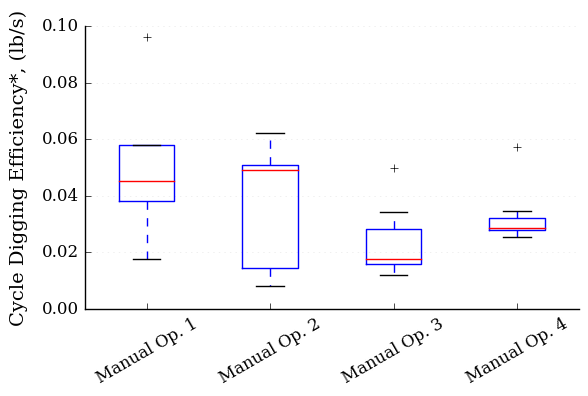

In [5]:
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=12)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=12)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on a horizontal grid and set appropriate linestyle and color
ax.yaxis.grid(True, linestyle=':', which='major', color='lightgrey',
               alpha=0.5)
ax.set_axisbelow(True)

# Define the X and Y axis labels
# plt.xlabel('Operators and Control Architecture', family='serif', fontsize=14, labelpad=5)
plt.ylabel('Cycle Digging Efficiency*, (lb/s)', family='serif', fontsize=14, labelpad=10)

plt.boxplot(data_inv)
plt.xticks(range(1, 5),labels, rotation=30)

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax.yaxis.grid(True, linestyle=':', which='major', color='lightgrey',
               alpha=0.5)

# plt.xlabel('')
# plt.ylabel('Time per unit mass of material moved during one cycle, (s/lb)')

plt.tight_layout()
plt.savefig('box_plot.pdf', dpi=600)
plt.show()

